In [1]:
# project: p6
# submitter: mchoi82
# partner: none
# hours: 25

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon
import sqlite3
from sqlite3 import connect
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import rasterio
from rasterio.mask import mask

In [3]:
#q1
wi = gpd.read_file("counties.geojson")
wi.shape[0]

72

<AxesSubplot:>

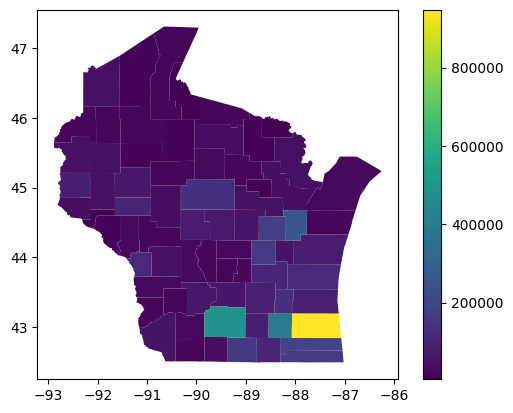

In [4]:
#q2
wi.plot(column ='POP100',legend = True)

In [5]:
#q3
conn = sqlite3.connect("counties_tracts.db")
arealand = pd.read_sql("""SELECT * FROM counties""", conn)['AREALAND']
wi['AREALAND'] = arealand
train, test = train_test_split(wi, random_state = 250, test_size=0.25)
list(test['NAME'])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [6]:
#q4
#How much variance in the POP100 can a LinearRegression model explain based only on AREALAND?
#fit the model to your train dataset and score it on your test dataset.
#pop_var = wi['POP100'].var()
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])


0.016720430179409274

In [7]:
#q5
convert_sq_meter = 400*2.59*(10**6)
pre = pd.DataFrame({"AREALAND":[convert_sq_meter]})
model.predict(pre)[0]

90000.07422783462

In [8]:
#q6
sum_hu100 = pd.read_sql("""SELECT counties.NAME, SUM(HU100) AS HU100 FROM counties LEFT JOIN tracts 
ON tracts.COUNTY=counties.COUNTY GROUP BY counties.NAME """, conn)
new_wi = pd.merge(wi, sum_hu100, on=["NAME"])
train, test = train_test_split(new_wi, random_state = 250, test_size=0.25)
list(test['NAME'])
#sum_hu100

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [9]:
#q7
df = test[["NAME","HU100"]]
dict(zip(df.NAME, df.HU100))

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [10]:
#q8
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
X = train[["HU100"]]
y = train["POP100"]
cv = cross_val_score(model, X, y, cv=5)
cv.mean()

0.9739348181232653

In [11]:
#q9
cv.std()

0.01693954236334351

In [12]:
#q10
slope = model.coef_[0].round(2)
inte = model.intercept_.round(2)
f"POP100 = {slope}*HU100 + {inte}"

'POP100 = 2.47*HU100 + -9276.89'

Text(104371, 248007, 'Brown')

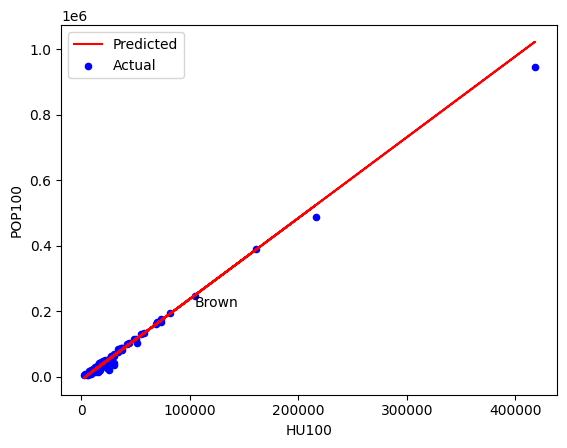

In [13]:
#q11
#What is the relationship between HU100 and POP100, visually?
pre = pd.DataFrame({"HU100":new_wi['HU100']})
pre['predict'] = model.predict(pre)
ax = pre.plot.line(x='HU100', y='predict', color='r')
new_wi.plot.scatter(x='HU100',y='POP100', ax=ax, color='b')
plt.legend(["Predicted", "Actual"])
index = new_wi[new_wi['NAME']=='Brown County'].index.values[0] 
x_pos = new_wi['HU100'][index]
y_pos = new_wi['POP100'][index]
plt.text(x_pos, y_pos, "Brown", ha='left', va='top')

In [14]:
#q12
#How many numbers in matrix A are between 3 and 6 (inclusive)?
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

c = (A >= 3) & (A <=6)
count = np.sum(c)
count

8

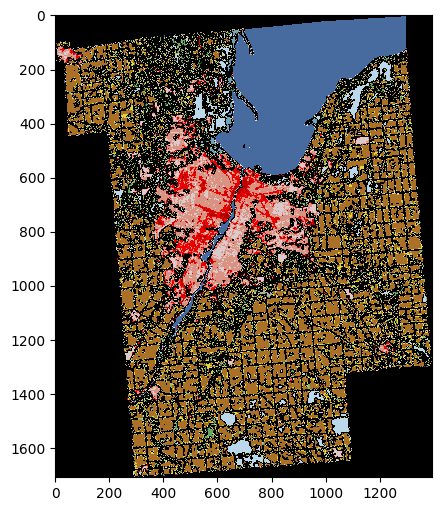

In [15]:
#q13
#How does Brown County look?
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)
county = gpd.read_file("counties.geojson")
brown = county[county['NAME']=='Brown County']
land = rasterio.open("zip://../p6/land.zip!wi.tif")
matrix, _ = mask(land, brown.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)


In [16]:
#q14
#What portion of Brown County is "Open Water"?
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}
ele = (matrix==land_use['open_water'])
np.count_nonzero(ele)/np.count_nonzero(matrix)

0.13797526789725206

<AxesSubplot:xlabel='ice', ylabel='POP100'>

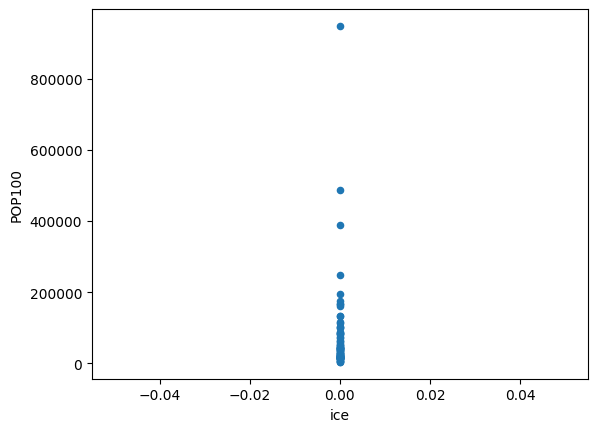

In [17]:
#q15
#What is the Relationship Between POP100 and--?
def get_land(county_name):
    c = county[county['NAME']==county_name]
    matrix, _ = mask(land, c.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0] 
    return (matrix==12).astype(int).sum()

new_wi['ice'] = new_wi.apply(lambda x: get_land(x['NAME']),axis=1)

new_wi.plot.scatter(x='ice',y='POP100')

'\nthe graph is showing each land_use impact on predicting POP100.\nThe graph below shows that "developed_med" has the highest correlation\nwith predicting POP100. Therefore, the "developed_med" feature relies on the model the most.\n'

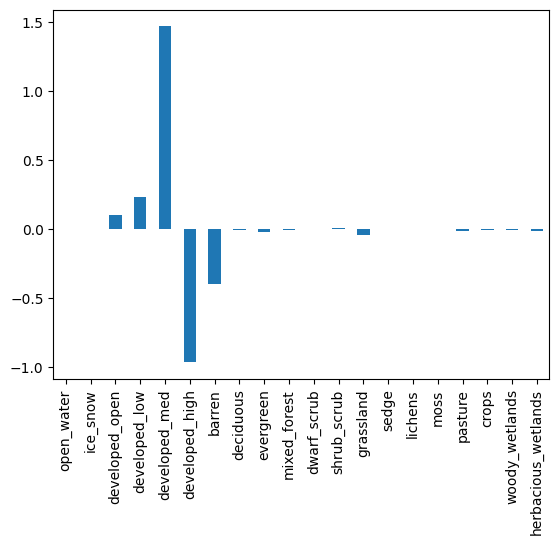

In [18]:
#q16
tracts = gpd.read_file("tracts.shp")
for i in tracts.index:
    df = tracts[tracts.index==i]
    matrix, _ = mask(land, df.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    for elem in land_use:
        ele = (matrix==land_use[elem]).astype(int).sum()
        tracts.at[i, elem] = ele
train, test = train_test_split(tracts, random_state = 320)

x_cols = list(land_use.keys())
y_cols = "POP100" 
model.fit(train[x_cols], train[y_cols])
model.score(test[x_cols], test[y_cols])
pd.Series(model.coef_, index=x_cols).plot.bar()

'''
the graph is showing each land_use impact on predicting POP100.
The graph below shows that "developed_med" has the highest correlation
with predicting POP100. Therefore, the "developed_med" feature relies on the model the most.
'''
    

In [19]:
#q17
model1, model2 = LinearRegression(), LinearRegression()
x_cols1 = ['developed_med']
y_cols1 = "POP100" 
model1.fit(train[x_cols1], train[y_cols1])
score = model1.score(test[x_cols1], test[y_cols1]).var()
#print('score:',score)
cv1 = cross_val_score(model1, train[x_cols1], train[y_cols1], cv=5)
#print(cv1.mean())

x_cols2 = ['developed_low', 'developed_open']
y_cols2 = "POP100" 
model2.fit(train[x_cols2], train[y_cols2])
score = model2.score(test[x_cols2], test[y_cols2]).mean()
cv2 = cross_val_score(model2, train[x_cols2], train[y_cols2], cv=5)
#print(cv2.mean())
#print(score)

'''
I would recommend using model 1 as it has
1)higher score
2)higher cross-validation
3)little variance across scores (according to 'score' variable)
4)simple model
'''

model1.fit(train[x_cols1], train[y_cols1])
model1.score(test[x_cols1], test[y_cols1])



0.35185042724015203